In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-rc0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0-rc0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape) # x
print(housing.target.shape) # y

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
# 划分样本
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7 # 随机种子
)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11
)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
print(x_train_scaled[0])
print(y_train[0])

[ 0.80154431  0.27216142 -0.11624393 -0.20231151 -0.54305157 -0.02103962
 -0.58976206 -0.08241846]
3.226


In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(4,activation="relu",
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

model.summary()

model.compile(loss = "mean_squared_error",               # 损失函数
              optimizer = "adam",                       # 模型的求解方法
              metrics = ["accuracy"],                   # 增加 accuracy 指标
              )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [8]:
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-4)]

# epochs 训练集遍历次数
history = model.fit(x_train_scaled,y_train,epochs=10,
          validation_data=(x_valid_scaled,y_valid),
          callbacks=callbacks
          )

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 182us/sample - loss: 3.5382 - accuracy: 0.0028 - val_loss: 2.1572 - val_accuracy: 0.0023
Epoch 2/10
11610/11610 [==============================] - 1s 94us/sample - loss: 1.4966 - accuracy: 0.0031 - val_loss: 1.0083 - val_accuracy: 0.0023
Epoch 3/10
11610/11610 [==============================] - 1s 94us/sample - loss: 0.9181 - accuracy: 0.0031 - val_loss: 0.7953 - val_accuracy: 0.0023
Epoch 4/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.7620 - accuracy: 0.0031 - val_loss: 0.7183 - val_accuracy: 0.0023
Epoch 5/10
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6741 - accuracy: 0.0031 - val_loss: 0.6631 - val_accuracy: 0.0023
Epoch 6/10
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6122 - accuracy: 0.0031 - val_loss: 0.6191 - val_accuracy: 0.0023
Epoch 7/10
11610/11610 [==============================] 

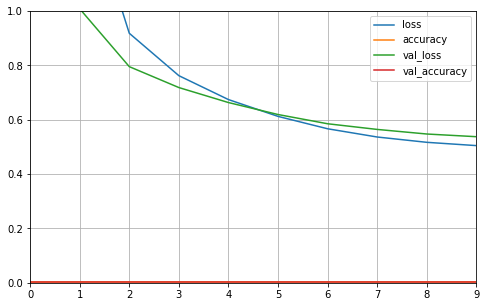

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5219646086988523, 0.0032945736]